# The Kolmogorov-Smirnov Test - Lab

## Introduction
In the previous lesson, we saw that the Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. In this lab, we shall see how to perform this test in Python. 

## Objectives

In this lab you will:

- Calculate a one- and two-sample Kolmogorov-Smirnov test
- Interpret the results of a one- and two-sample Kolmogorov-Smirnov test
- Compare K-S test to visual approaches for testing for normality assumption

### Data

Let's import the necessary libraries and generate some data. Run the following cell: 

In [25]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Create the normal random variables with mean 0, and sd 3
x_10 = stats.norm.rvs(loc=0, scale=3, size=10)
x_50 = stats.norm.rvs(loc=0, scale=3, size=50)
x_100 = stats.norm.rvs(loc=0, scale=3, size=100)
x_1000 = stats.norm.rvs(loc=0, scale=3, size=1000)

### Plots 

Plot histograms and Q-Q plots of above datasets and comment on the output 

- How good are these techniques for checking normality assumptions?
- Compare both these techniques and identify their limitations/benefits etc. 


x_10
x_50
x_100
x_1000


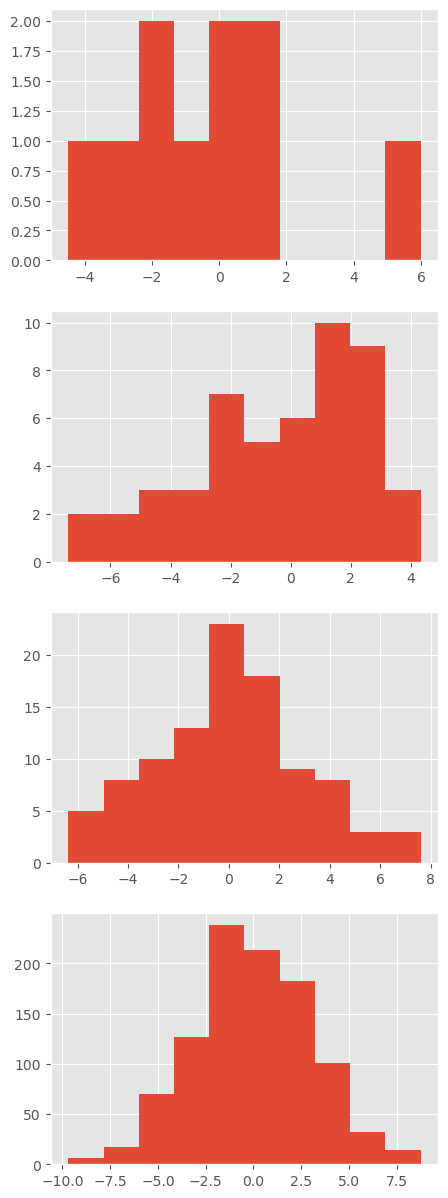

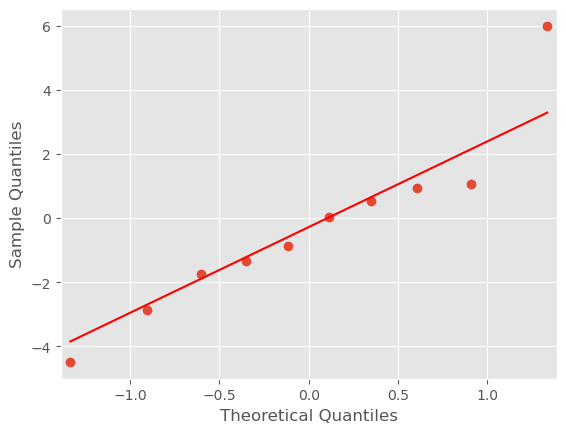

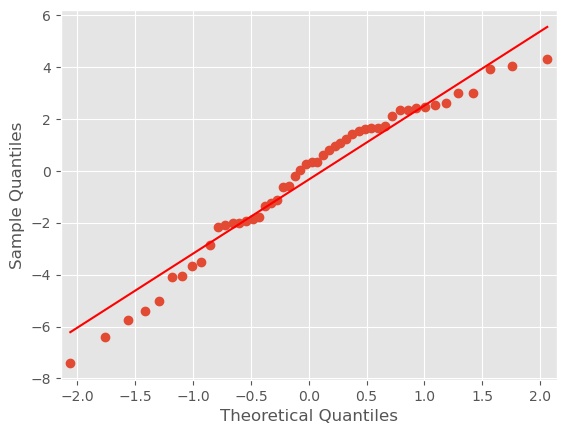

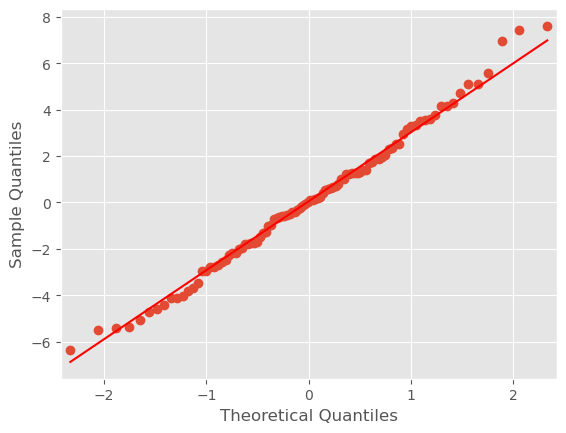

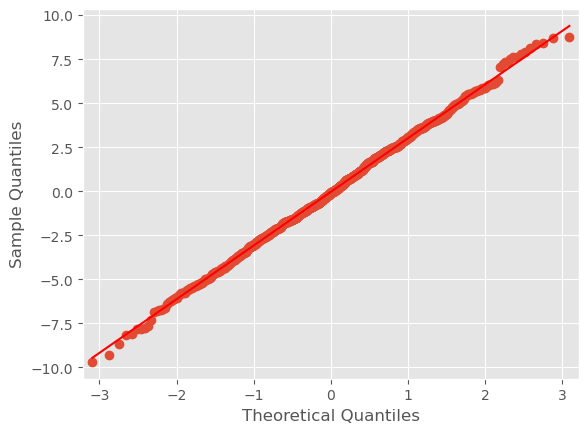

In [2]:
# Plot histograms and Q-Q plots for above datasets

fig, [ax1, ax2, ax3, ax4] = plt.subplots(figsize=(5,15), nrows=4)
print("x_10")
ax1.hist(x_10)
sm.qqplot(x_10, line='s')

print("x_50")
ax2.hist(x_50)
sm.qqplot(x_50, line='s')

print("x_100")
ax3.hist(x_100)
sm.qqplot(x_100, line='s')

print("x_1000")
ax4.hist(x_1000)
sm.qqplot(x_1000, line='s');

x_10


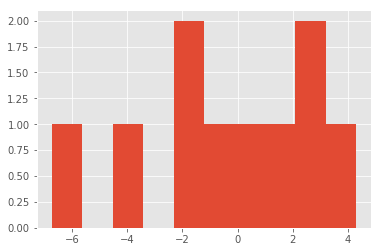

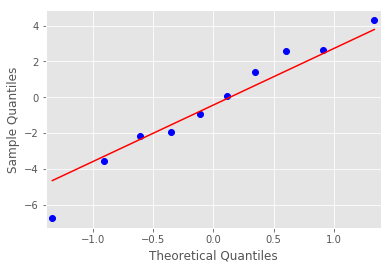

x_50


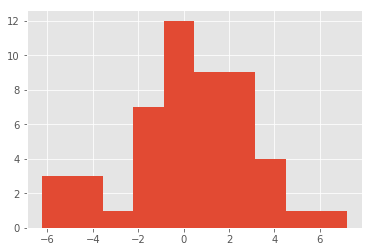

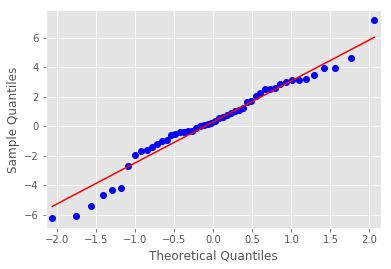

x_100


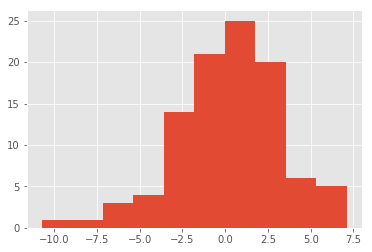

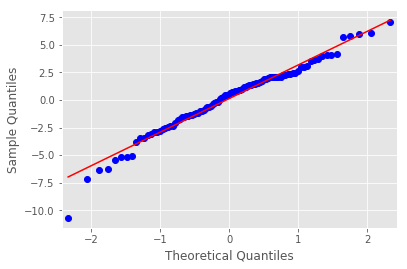

x_1000


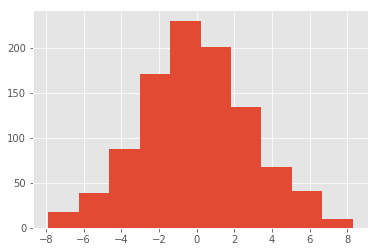

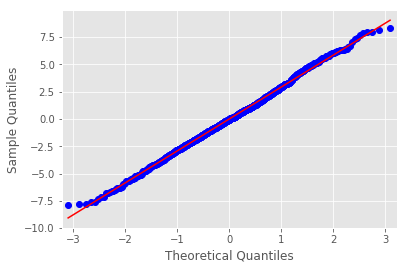

In [2]:
# Plot histograms and Q-Q plots for above datasets



In [20]:
# Your comments here
print("""
Both the histogram and quantile-quantile plots of the different sample sizes show that as the
sample size increases, the sample distribution approaches a normal distribution.
""")


Both the histogram and quantile-quantile plots of the different sample sizes show that as the
sample size increases, the sample distribution approaches a normal distribution.



### Create a function to plot the normal CDF and ECDF for a given dataset
- Create a function to generate an empirical CDF from data
- Create a normal CDF using the same mean = 0 and sd = 3, having the same number of values as data

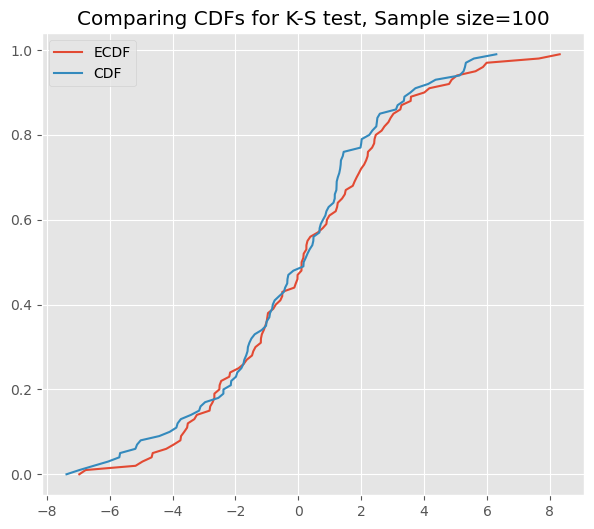

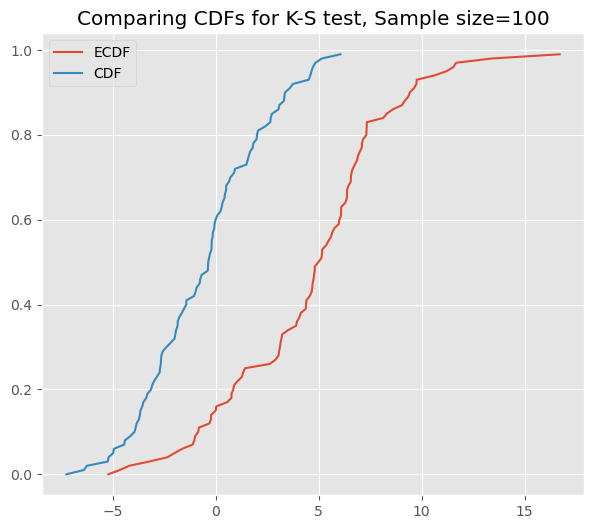

In [15]:
def ks_plot(data):

    plt.figure(figsize=(7, 6))
    plt.plot(np.sort(data), np.linspace(0, 1, len(data), endpoint=False))
    plt.plot(np.sort(stats.norm.rvs(loc=0, scale=3, size=len(data))), np.linspace(0, 1, len(data), endpoint=False))

    plt.legend(['ECDF', 'CDF'])
    plt.title('Comparing CDFs for K-S test, Sample size='+ str(len(data)))
    

ks_plot(stats.norm.rvs(loc=0, scale=3, size=100)) 
ks_plot(stats.norm.rvs(loc=5, scale=4, size=100))

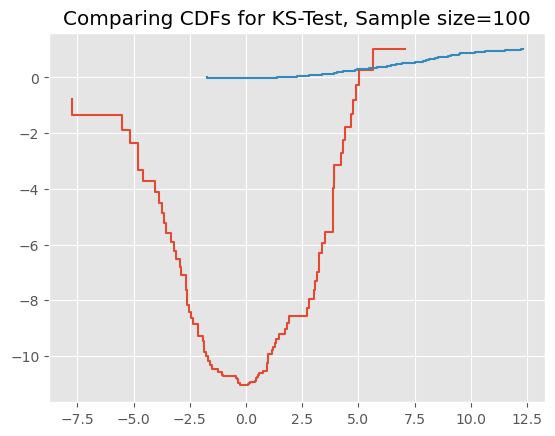

In [7]:
# Trial code

def ks_plot(data):
    count = 0
    ecdf_val = []
    for x_i in np.sort(data):
        count += x_i
        prob_x_i = count/sum(data)
        ecdf_val.append(prob_x_i)  
    plt.step(np.sort(data), ecdf_val)
    plt.title("Comparing CDFs for KS-Test, Sample size=100");
    return None
    pass
# xy = [12, 12 , 11,  9, 11, 12, 10, 11, 10,  9, 9, 10]
# ks_plot(xy)
# Uncomment below to run the test
ks_plot(stats.norm.rvs(loc=0, scale=3, size=100)) 
ks_plot(stats.norm.rvs(loc=5, scale=4, size=100))

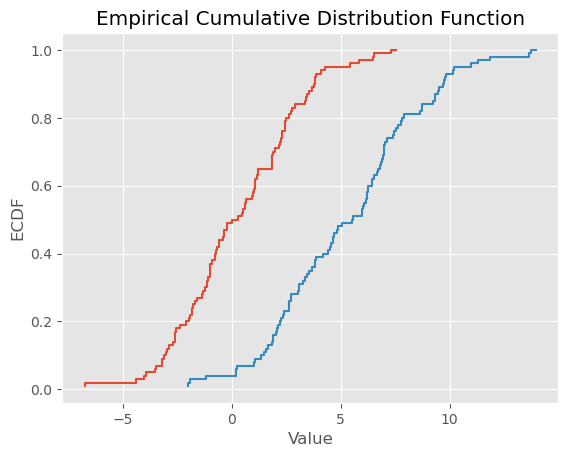

In [4]:
# Trial for ECDF only
import numpy as np
import matplotlib.pyplot as plt

def empirical_cdf(data):
    data_sorted = np.sort(data)
    n = len(data)
    ecdf_values = np.arange(1, n + 1) / n
    return data_sorted, ecdf_values

# Generate empirical CDF
sorted_data, ecdf_values = empirical_cdf(stats.norm.rvs(loc=0, scale=3, size=100))
sorted_data1, ecdf_values1 = empirical_cdf(stats.norm.rvs(loc=5, scale=4, size=100))

# Plot empirical CDF
plt.step(sorted_data, ecdf_values) #linestyle='--'
plt.step(sorted_data1, ecdf_values1)
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.title('Empirical Cumulative Distribution Function')

plt.show()

# empirical_cdf(stats.norm.rvs(loc=0, scale=3, size=100)) 
# empirical_cdf(stats.norm.rvs(loc=5, scale=4, size=100))

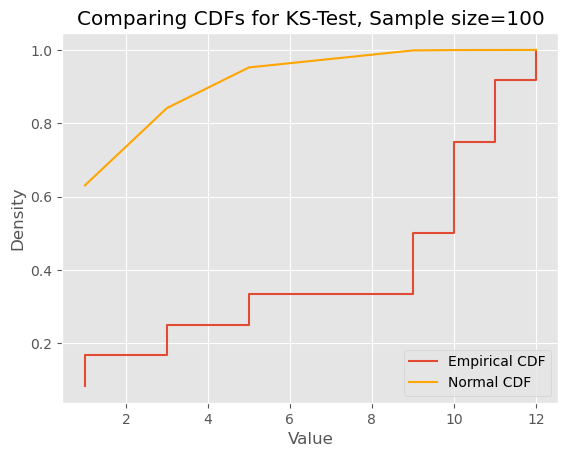

In [60]:
# Trial for CDF and ECDF
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def ks_plot(data):
    data_sorted = np.sort(data)
    n = len(data)
    ecdf_values = np.arange(1, n + 1) / n
    
    mean = 0
    std_dev = 3
    normal_cdf_values = norm.cdf(data_sorted, loc=mean, scale=std_dev)
    
    return data_sorted, ecdf_values, normal_cdf_values

# Sample data (replace with your own data)
data = [1, 12 , 3,  9, 11, 12, 10, 11, 10,  5, 9, 10]
#data = ks_plot(stats.norm.rvs(loc=0, scale=3, size=100)) 
#ks_plot(stats.norm.rvs(loc=5, scale=4, size=100))

# Generate empirical CDF and normal CDF
sorted_data, ecdf_values, normal_cdf_values = ks_plot(data)

# Plot empirical CDF and normal CDF
plt.step(sorted_data, ecdf_values, label='Empirical CDF')
plt.plot(sorted_data, normal_cdf_values, color='orange', label='Normal CDF')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Comparing CDFs for KS-Test, Sample size=100')
plt.legend()

plt.show()

This is awesome. The difference between the two CDFs in the second plot shows that the sample did not come from the distribution which we tried to compare it against. 

Now you can run all the generated datasets through the function `ks_plot()` and comment on the output.

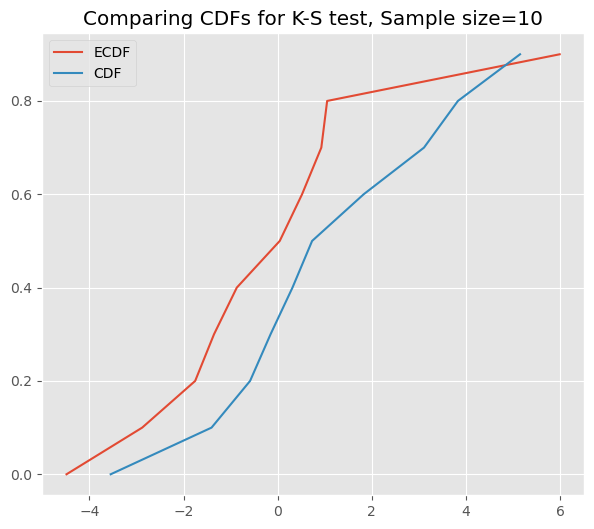

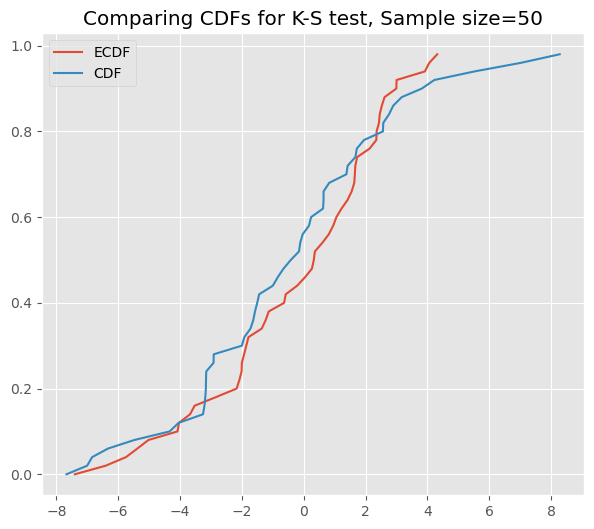

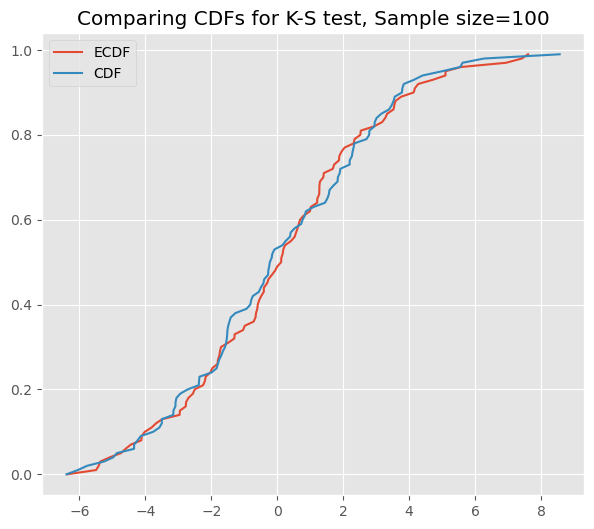

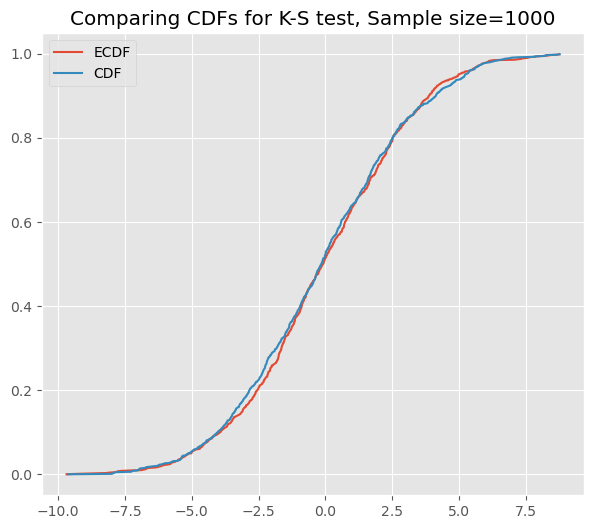

In [17]:
# Plot the ECDF and CDF for x_10, x_50, x_100, x_1000
ks_plot(x_10) 
ks_plot(x_50)
ks_plot(x_100) 
ks_plot(x_1000)

In [19]:
# Comment
print("""
The deviation (d-statistic) of the random variable distribution from a normal distribution is largest when the sample size 
is 10 and smallest when the sample size is 1,000.
It is therefore clear that the test for normality gets better as the sample size increases.
""")


The deviation (d-statistic) of the random variable distribution from a normal distribution is largest when the sample size 
is 10 and smallest when the sample size is 1,000.
It is therefore clear that the test for normality gets better as the sample size increases.



### K-S test in SciPy

Let's run the Kolmogorov-Smirnov test, and use some statistics to get a final verdict on normality. We will test the hypothesis that the sample is a part of the standard t-distribution. In SciPy, we run this test using the function below:

```python
scipy.stats.kstest(rvs, cdf, args=(), N=20, alternative='two-sided', mode='approx')
```
Details on arguments being passed in can be viewed at this [link to the official doc.](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html)

Run the K-S test for normality assumption using the datasets created earlier and comment on the output: 
- Perform the K-S test against a normal distribution with mean = 0 and sd = 3
- If p < .05 we can reject the null hypothesis and conclude our sample distribution is not identical to a normal distribution 

In [15]:
# Perform K-S test 

# Your code here 

# KstestResult(statistic=0.1377823669421559, pvalue=0.9913389045954595)
# KstestResult(statistic=0.13970573965633104, pvalue=0.2587483380087914)
# KstestResult(statistic=0.0901015276393986, pvalue=0.37158535281797134)
# KstestResult(statistic=0.030748345486274697, pvalue=0.29574612286614443)

KstestResult(statistic=0.1377823669421559, pvalue=0.9913389045954595)
KstestResult(statistic=0.13970573965633104, pvalue=0.2587483380087914)
KstestResult(statistic=0.0901015276393986, pvalue=0.37158535281797134)
KstestResult(statistic=0.030748345486274697, pvalue=0.29574612286614443)


In [ ]:
# Your comments here 

Generate a uniform distribution and plot / calculate the K-S test against a uniform as well as a normal distribution: 

In [17]:
x_uni = np.random.rand(1000)
# Try with a uniform distribution

# KstestResult(statistic=0.023778383763166322, pvalue=0.6239045200710681)
# KstestResult(statistic=0.5000553288071681, pvalue=0.0)

KstestResult(statistic=0.023778383763166322, pvalue=0.6239045200710681)
KstestResult(statistic=0.5000553288071681, pvalue=0.0)


In [ ]:
# Your comments here 

## Two-sample K-S test

A two-sample K-S test is available in SciPy using following function: 

```python 
scipy.stats.ks_2samp(data1, data2)[source]
```

Let's generate some bi-modal data first for this test: 

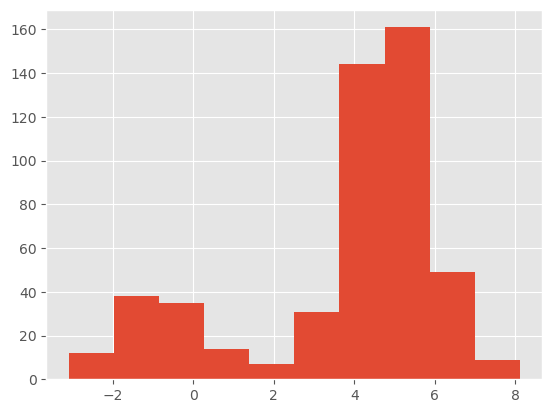

In [67]:
# Generate binomial data
N = 1000
x_1000_bi = np.concatenate((np.random.normal(-1, 1, int(0.1 * N)), np.random.normal(5, 1, int(0.4 * N))))[:, np.newaxis]
plt.hist(x_1000_bi);

Plot the CDFs for `x_1000_bimodal` and `x_1000` and comment on the output. 

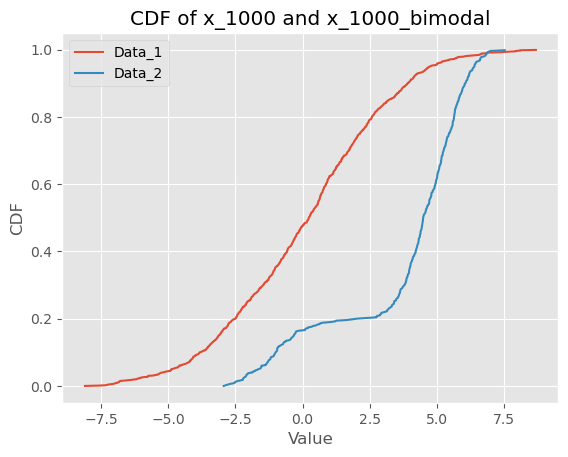

In [62]:
# Plot the CDFs
def ks_plot_2sample(data_1, data_2):
    '''
    Data entered must be the same size.
    '''
    # Sort the dataset
    data_1_sorted = np.sort(data_1)
    data_2_sorted = np.sort(data_2)

    # Plot the cdfs
    plt.plot(data_1_sorted, np.linspace(0, 1, len(data_1), endpoint=False))
    plt.plot(data_2_sorted, np.linspace(0, 1, len(data_2), endpoint=False))
    plt.xlabel('Value')
    plt.ylabel('CDF')
    plt.title('CDF of x_1000 and x_1000_bimodal')
    plt.legend(['Data_1', 'Data_2']);

ks_plot_2sample(x_1000, x_1000_bi[:,0])

In [63]:
# You comments here 
print("""
The bimodal distribution has a wide deviation from a normal distribution""")


The bimodal distribution has a wide deviation from a normal distribution


Run the two-sample K-S test on `x_1000` and `x_1000_bi` and comment on the results. 

In [66]:
# Your code here
stats.kstest(x_1000, x_1000_bi[:,0])

# Ks_2sampResult(statistic=0.633, pvalue=4.814801487740621e-118)

KstestResult(statistic=0.624, pvalue=2.74576164192011e-122)

In [69]:
# Your comments here 
print("""
The pvalue of 2.74576164192011e-122 is much less than the alpha of 0.05, so we reject the null hypothesis
and conclude that the two samples belong to different distributions""")


The pvalue of 2.74576164192011e-122 is much less than the alpha of 0.05, so we reject the null hypothesis
and conclude that the two samples belong to different distributions


## Summary

In this lesson, we saw how to check for normality (and other distributions) using one- and two-sample K-S tests. You are encouraged to use this test for all the upcoming algorithms and techniques that require a normality assumption. We saw that we can actually make assumptions for different distributions by providing the correct CDF function into Scipy K-S test functions. 